!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

C:\Users\PAAV\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
C:\Users\PAAV\anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [2]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray

In [3]:
loan = pd.read_csv('loans.csv')
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,304819,Estrella De Luz Group,Spanish,"Este grupo se llama ""Estrella de luz"" está ubi...",This group is called “Estrella de Luz” (Star o...,2600.0,2600.0,funded,785529.0,NaN,...,6.0,6,1,1,NaN,"MARISOL, ANGELICA, EVA, JUANA, ISABEL, MARIA P...","female, female, female, female, female, female...","true, true, true, true, true, true, true, true...",monthly,field_partner
1,1361590,Grace,English,"Grace is an honest, humble, and hard-working p...","Grace is an honest, humble, and hard-working p...",600.0,600.0,funded,2614927.0,NaN,...,20.0,21,2,1,"#Parent, #Woman-Owned Business",Grace,female,true,monthly,field_partner
2,1776536,Ligaya,English,Ligaya is a hardworking micro-entrepreneur.<br...,Ligaya is a hardworking micro-entrepreneur.<br...,200.0,200.0,funded,3173512.0,NaN,...,13.0,8,2,1,"#Eco-friendly, #Health and Sanitation",Ligaya,female,true,monthly,field_partner
3,213423,Phorn Vann's Group,English,"Mrs. Phorn V., who is 61 years old, is the gro...",NaN,650.0,650.0,funded,565776.0,NaN,...,14.0,19,1,1,NaN,"Phorn, Bunthorn, Moeurn, Mi, Yim","female, male, female, female, female","true, true, true, true, true",bullet,field_partner
4,410154,Grace,English,Grace is 55 years old and married with 4 child...,NaN,625.0,625.0,funded,1059131.0,NaN,...,14.0,17,1,1,NaN,Grace,female,true,monthly,field_partner


In [4]:
loan.isnull().sum()

LOAN_ID                                  0
LOAN_NAME                            50389
ORIGINAL_LANGUAGE                    46040
DESCRIPTION                          46269
DESCRIPTION_TRANSLATED              455655
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             46040
VIDEO_ID                           2185897
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             46063
COUNTRY_CODE                            36
COUNTRY_NAME                             0
TOWN_NAME                           179089
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     527609
CURRENCY                                 0
PARTNER_ID                               0
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4274
RAISED_TIME

In [5]:
loan['DESCRIPTION_TRANSLATED'] = loan['DESCRIPTION_TRANSLATED'].replace('', pd.NA).fillna(loan['DESCRIPTION'])

In [9]:
loandf = loan.sample(1500000, random_state=250).reset_index(drop=True)

In [ ]:
##loandf['DESCRIPTION_TRANSLATED'] = loandf['DESCRIPTION_TRANSLATED'].fillna(loandf.pop('DESCRIPTION'))

In [10]:
loandf.isnull().sum()

LOAN_ID                                  0
LOAN_NAME                            34453
ORIGINAL_LANGUAGE                    31488
DESCRIPTION                          31634
DESCRIPTION_TRANSLATED               31634
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             31488
VIDEO_ID                           1499154
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             31500
COUNTRY_CODE                            27
COUNTRY_NAME                             0
TOWN_NAME                           122936
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     361878
CURRENCY                                 0
PARTNER_ID                               0
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             255234
DISBURSE_TIME                         2919
RAISED_TIME

In [11]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 34 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   LOAN_ID                          1500000 non-null  int64  
 1   LOAN_NAME                        1465547 non-null  object 
 2   ORIGINAL_LANGUAGE                1468512 non-null  object 
 3   DESCRIPTION                      1468366 non-null  object 
 4   DESCRIPTION_TRANSLATED           1468366 non-null  object 
 5   FUNDED_AMOUNT                    1500000 non-null  float64
 6   LOAN_AMOUNT                      1500000 non-null  float64
 7   STATUS                           1500000 non-null  object 
 8   IMAGE_ID                         1468512 non-null  float64
 9   VIDEO_ID                         846 non-null      float64
 10  ACTIVITY_NAME                    1500000 non-null  object 
 11  SECTOR_NAME                      1500000 non-null 

In [19]:
loandfs = loandf.sample(1000, random_state=250).reset_index(drop=True)

In [20]:
loandfs['DESCRIPTION_TRANSLATED']= loandfs['DESCRIPTION_TRANSLATED'].astype(str)


In [21]:
loandfs['DESCRIPTION_TRANSLATED'].head

<bound method NDFrame.head of 0      Pictured above is Joseph, father of six childr...
1      For three years Daysi has been running a small...
2      Mrs Huệ is 34 years old and lives with her hus...
3      At 19 years of age, Evely is the principal sho...
4      2 Ward – 1 Village Group is located in the Pya...
                             ...                        
995    Nokukhanya is a female, age 29, living in Hara...
996    Santra is a 44-year-old married woman residing...
997    The group is called Mujeres Unidas [Women Unit...
998    Yendry is 23 years old, is married, and lives ...
999    Tem K., 40, sells sugar cane juice from her ho...
Name: DESCRIPTION_TRANSLATED, Length: 1000, dtype: object>

In [25]:
import re
new_text = re.sub(r"[^a-zA-Z0-9 ]", "",str(loandfs.DESCRIPTION_TRANSLATED))

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

In [26]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM','NOUN','X']
tokens = []
for DESCRIPTION_TRANSLATED in nlp.pipe(loandfs['DESCRIPTION_TRANSLATED']):
   proj_tok = [token.lemma_.lower() for token in DESCRIPTION_TRANSLATED if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [30]:
loandfs['tokens'] = tokens
loandfs['tokens']

0      [picture, joseph, know, reliable, represent, f...
1      [daysi, run, small, old, work, want, despite, ...
2      [mrs, huệ, old, live, hau, loc, district, coas...
3      [principal, nazca, peru, famous, nazca, lines,...
4      [ward, village, group, locate, pyapon, distric...
                             ...                        
995    [nokukhanya, female, live, harare, zimbabwe, p...
996    [santra, old, married, reside, jaipur, rajasth...
997    [call, mujeres, unidas, women, united, unite, ...
998    [yendry, old, married, live, want, buy, help, ...
999    [tem, sell, prey, veng, marry, live, picture, ...
Name: tokens, Length: 1000, dtype: object

In [31]:
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(loandfs['tokens'])

In [32]:
print(dictionary.token2id)

{'able': 0, 'acre': 1, 'alego': 2, 'buy': 3, 'district': 4, 'feed': 5, 'form': 6, 'fund': 7, 'good': 8, 'group': 9, 'improve': 10, 'join': 11, 'joseph': 12, 'know': 13, 'picture': 14, 'plan': 15, 'plant': 16, 'purchase': 17, 'receive': 18, 'reliable': 19, 'represent': 20, 'say': 21, 'solar': 22, 'upcoming': 23, 'want': 24, 'additional': 25, 'adelante': 26, 'adicional': 27, 'afirma': 28, 'algunas': 29, 'allow': 30, 'amigas': 31, 'asociación': 32, 'ayuda': 33, 'años': 34, 'bodega': 35, 'cada': 36, 'canastas': 37, 'carga': 38, 'casa': 39, 'cinco': 40, 'como': 41, 'con': 42, 'contar': 43, 'count': 44, 'cuenta': 45, 'daysi': 46, 'de': 47, 'dentro': 48, 'despite': 49, 'diversas': 50, 'donde': 51, 'día': 52, 'edad': 53, 'ella': 54, 'ello': 55, 'emergencia': 56, 'emprendedora': 57, 'empresa': 58, 'empresarial': 59, 'enterprise': 60, 'es': 61, 'esas': 62, 'esposo': 63, 'extra': 64, 'falta': 65, 'formas': 66, 'grupo': 67, 'habilidades': 68, 'haga': 69, 'harvey': 70, 'hijos': 71, 'implement': 72,

In [33]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [35]:
corpus = [dictionary.doc2bow(doc) for doc in loandfs['tokens']]

In [36]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

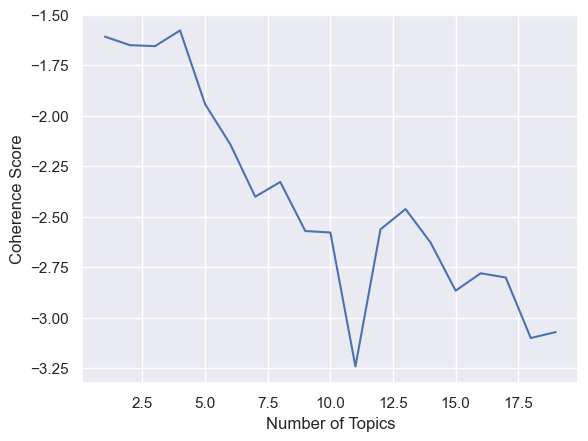

In [37]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

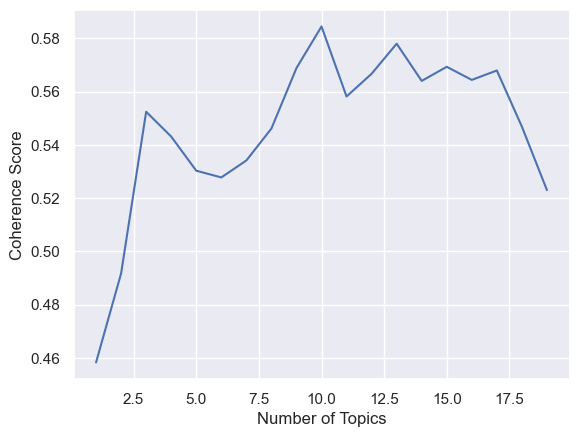

In [38]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = loandfs['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [39]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers = 4, passes=100)

In [40]:
lda_model.print_topics(-1)

[(0,
  '0.046*"philippines" + 0.045*"php" + 0.045*"request" + 0.040*"save" + 0.038*"sell" + 0.033*"like" + 0.028*"de" + 0.026*"general" + 0.025*"run" + 0.025*"provide"'),
 (1,
  '0.029*"join" + 0.023*"improve" + 0.023*"purchase" + 0.022*"able" + 0.021*"use" + 0.020*"kiva" + 0.020*"fund" + 0.017*"solar" + 0.016*"want" + 0.016*"acre"'),
 (2,
  '0.039*"sell" + 0.037*"work" + 0.028*"live" + 0.022*"help" + 0.020*"kiva" + 0.018*"want" + 0.017*"request" + 0.016*"good" + 0.015*"married" + 0.015*"able"'),
 (3,
  '0.050*"work" + 0.043*"request" + 0.039*"help" + 0.038*"support" + 0.036*"hope" + 0.035*"live" + 0.030*"married" + 0.027*"able" + 0.019*"earn" + 0.018*"sanitary"'),
 (4,
  '0.030*"sell" + 0.018*"use" + 0.018*"married" + 0.017*"live" + 0.017*"increase" + 0.016*"high" + 0.016*"hope" + 0.015*"earn" + 0.015*"improve" + 0.014*"help"')]

In [41]:
loandfs['DESCRIPTION_TRANSLATED'][0]

"Pictured above is Joseph, father of six children and known by his community as a very reliable person. He is representing his group formed by four farmers in Alego District, Kenya.<br /><br />Initially, Joseph joined One Acre Fund in 2014 because he wanted to have access to the best seed prices. Since he joined the program he says that his life has improved, especially because he has been able to consistently feed his family. With the profits from the upcoming harvest season, Joseph plans to buy a cow.<br /><br />Between the four farmers in Joseph's Group, a total of 1.5 acres of land will be planted using the maize seeds and fertilizer received with the loan. Additionally, some of the farmers in the group will be purchasing solar lights, and with this loan, the group will also receive a total of one solar light."

In [42]:
lda_model[corpus][0]

[(1, 0.9677726)]

In [44]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

C:\Users\PAAV\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [45]:
loandfs['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(loandfs['DESCRIPTION_TRANSLATED']))]

In [46]:
loandfs.topic.value_counts()

0    685
2    150
1    113
4     38
3     14
Name: topic, dtype: int64